In [ ]:
pip install pandas

In [ ]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


/tmp/ipython-input-7-847812643.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Dataset shape: X=(1984, 30, 5), y=(1984,)
Train shape: (1389, 30, 5), Validation shape: (297, 30, 5), Test shape: (298, 30, 5)

--- LSTM Model ---



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651 (2.54 KB)

 Trainable params: 651 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0095 - val_loss: 0.0179
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.2390e-04 - val_loss: 0.0112
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.7188e-04 - val_loss: 0.0065
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.4980e-04 - val_loss: 0.0057
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.7068e-04 - val_loss: 0.0061
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.4310e-04 - val_loss: 0.0048
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0933e-04 - val_loss: 0.0033
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.1566e-04 - val_loss: 0.0016
Epoch 9/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.9152e-04 - val_loss: 0.0033
Epoch 10/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.9533e-04 - val_loss: 0.0028
Epoch 11/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3038e-04 - val_loss: 0.0024
E

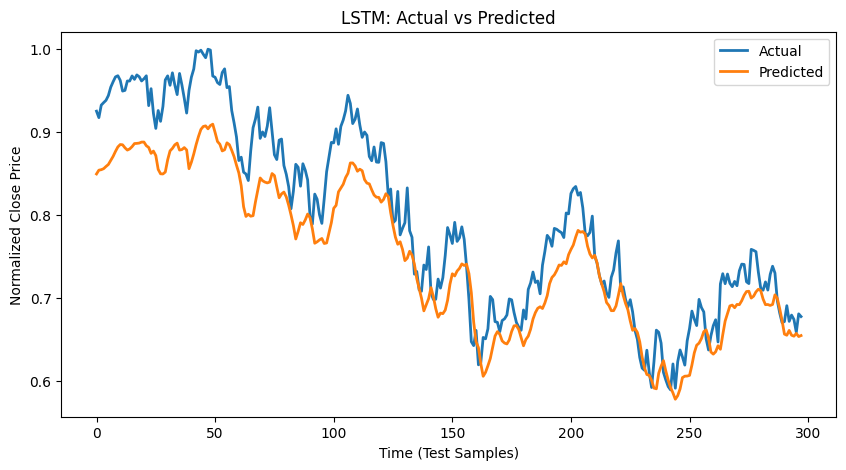

In [7]:



# Download data
ticker = "^GSPC"
df = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Select columns and drop missing
df = df[["Open", "High", "Low", "Close", "Volume"]].dropna()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Prepare sliding window data (30 days)
window_size = 30
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size][3])  # 'Close' price

X = np.array(X)
y = np.array(y)

print(f"Dataset shape: X={X.shape}, y={y.shape}")


X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.176, shuffle=False)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


def plot_predictions(y_true, y_pred, title="Actual vs Predicted Prices"):
    plt.figure(figsize=(10,5))
    plt.plot(y_true, label="Actual", linewidth=2)
    plt.plot(y_pred, label="Predicted", linewidth=2)
    plt.title(title)
    plt.xlabel("Time (Test Samples)")
    plt.ylabel("Normalized Close Price")
    plt.legend()
    plt.show()


def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(10, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_transfer_learning_model(base_model, input_shape):
    model = clone_model(base_model)
    model.build(input_shape=(None, *input_shape))
    for layer in model.layers[:-1]:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_ann_model(input_shape_flat):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(input_shape_flat,)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model


def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10, plot_title="Model Predictions"):
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=8,
        verbose=1
    )
    y_pred = model.predict(X_test).flatten()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test MSE: {mse:.6f}")
    print(f"Test RMSE: {rmse:.6f}")
    print(f"Test MAE: {mae:.6f}")
    print(f"Test R2: {r2:.4f}")

    plot_predictions(y_test, y_pred, title=plot_title)

    return model, y_pred


input_shape = (X_train.shape[1], X_train.shape[2])

print("\n--- LSTM Model ---")
lstm_model = build_lstm_model(input_shape)
lstm_model.summary()
lstm_model, preds_lstm = train_and_evaluate(
    lstm_model, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=30, plot_title="LSTM: Actual vs Predicted"
)




--- CNN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 8)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1281 - val_loss: 0.0223
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0019 - val_loss: 0.0098
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.9413e-04 - val_loss: 0.0024
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6671e-04 - val_loss: 0.0022
Epoch 9/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3745e-04 - val_loss: 0.0021
Epoch 10/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9544e-04 - val_loss: 0.0018
Epoch 11/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6746e-04 - val_loss: 0.0020
Epoch 12/30
174/174 ━━━━━━━━━━━━

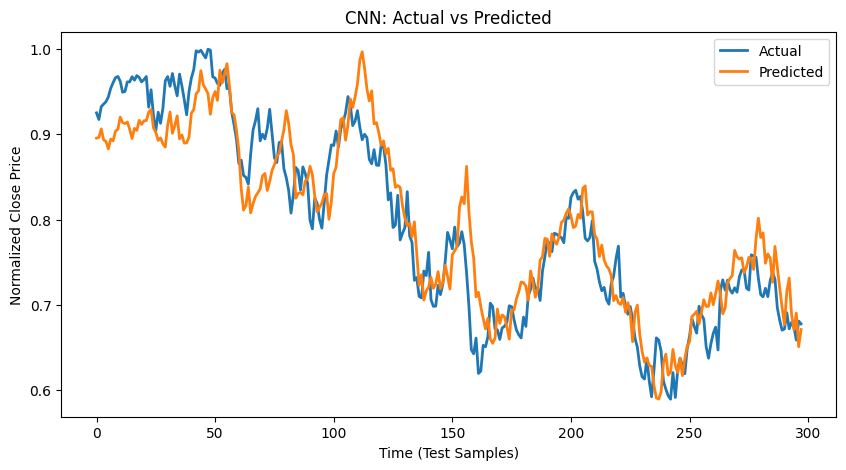

In [4]:
print("\n--- CNN Model ---")
cnn_model = build_cnn_model(input_shape)
cnn_model.summary()
cnn_model, preds_cnn = train_and_evaluate(
    cnn_model, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=30, plot_title="CNN: Actual vs Predicted"
)



--- Transfer Learning on CNN ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 8)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 128 (512.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0434 - val_loss: 0.0029
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8179e-04 - val_loss: 0.0020
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2190e-04 - val_loss: 0.0021
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6277e-04 - val_loss: 0.0020
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.2397e-04 - val_loss: 0.0018
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1327e-04 - val_loss: 0.0019
Epoch 9/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6092e-04 - val_loss: 0.0018
Epoch 10/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6278e-04 - val_loss: 0.0018
Epoch 11/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3588e-04 - val_loss: 0.0018
Epoch 12/30
174/174 

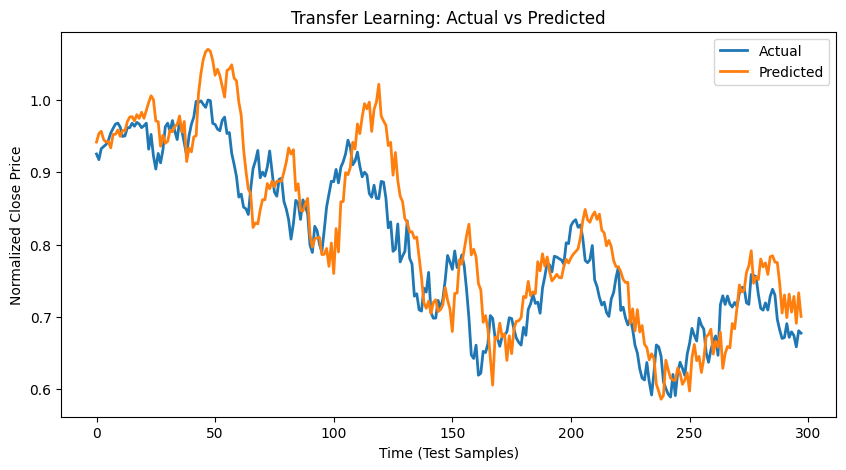

In [5]:
print("\n--- Transfer Learning on CNN ---")
transfer_model = build_transfer_learning_model(cnn_model, input_shape)
transfer_model.summary()
transfer_model, preds_transfer = train_and_evaluate(
    transfer_model, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=30, plot_title="Transfer Learning: Actual vs Predicted"
)



--- ANN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,521 (5.94 KB)

 Trainable params: 1,521 (5.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0141 - val_loss: 0.0043
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7439e-04 - val_loss: 0.0020
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.6425e-04 - val_loss: 0.0020
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9546e-04 - val_loss: 0.0013
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3075e-04 - val_loss: 6.5264e-04
Epoch 9/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1972e-04 - val_loss: 0.0055
Epoch 10/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6489e-04 - val_loss: 0.0013
Epoch 11/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7842e-04 - val_loss: 4.4186e-04
Epoch 12/30
174/

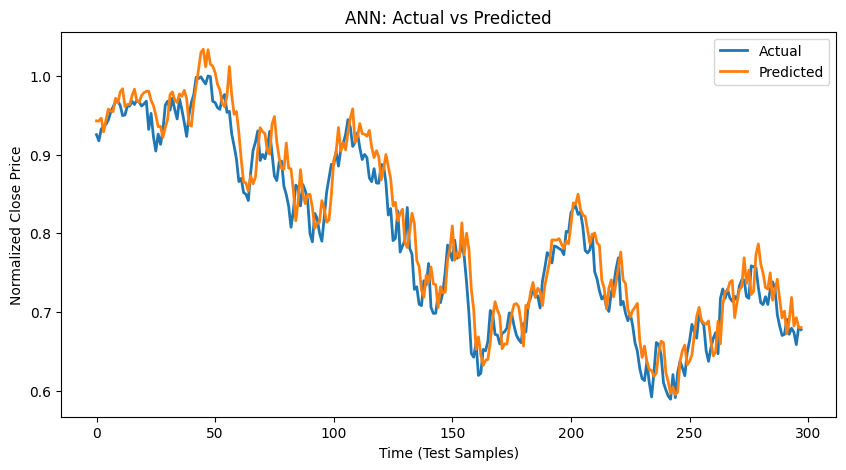

In [8]:
# Flatten input for ANN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("\n--- ANN Model ---")
ann_model = build_ann_model(X_train_flat.shape[1])
ann_model.summary()
ann_model, preds_ann = train_and_evaluate(
    ann_model, X_train_flat, y_train, X_val_flat, y_val, X_test_flat, y_test,
    epochs=30, plot_title="ANN: Actual vs Predicted"
)


In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [11]:
# Download data
ticker = "^GSPC"
df = yf.download(ticker, start="2015-01-01", end="2023-01-01")


/tmp/ipython-input-11-2392289311.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [12]:
# Preprocessing
df = df[["Open", "High", "Low", "Close", "Volume"]].dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [13]:
# Sliding window
window_size = 30
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size][3])  # Close price

X = np.array(X)
y = np.array(y)

print(f"Total dataset: X={X.shape}, y={y.shape}")

Total dataset: X=(1984, 30, 5), y=(1984,)


In [14]:
# Model builder functions
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(10, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_transfer_learning_model(base_model, input_shape):
    model = clone_model(base_model)
    model.build(input_shape=(None, *input_shape))
    for layer in model.layers[:-1]:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='mse')
    return model

def build_ann_model(input_shape_flat):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(input_shape_flat,)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def plot_predictions(y_true, y_pred, title="Actual vs Predicted Prices"):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label="Actual", linewidth=2)
    plt.plot(y_pred, label="Predicted", linewidth=2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Normalized Close Price")
    plt.legend()
    plt.show()

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=30, plot_title=""):
    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=epochs, batch_size=8, verbose=0)
    y_pred = model.predict(X_test).flatten()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{plot_title}")
    print(f"MSE: {mse:.6f}, RMSE: {rmse:.6f}, MAE: {mae:.6f}, R2: {r2:.4f}\n")
    return y_test, y_pred



=== Fold 1 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
LSTM Fold 1
MSE: 0.000120, RMSE: 0.010954, MAE: 0.008871, R2: 0.7009



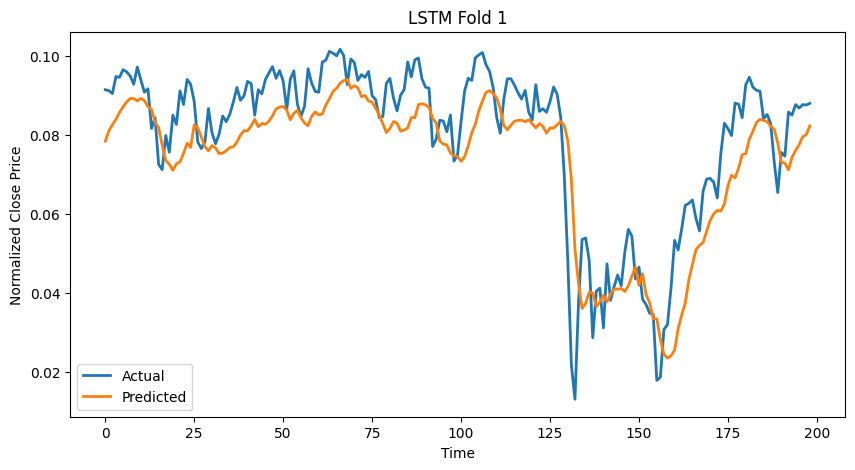

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
CNN Fold 1
MSE: 0.000123, RMSE: 0.011079, MAE: 0.008256, R2: 0.6941



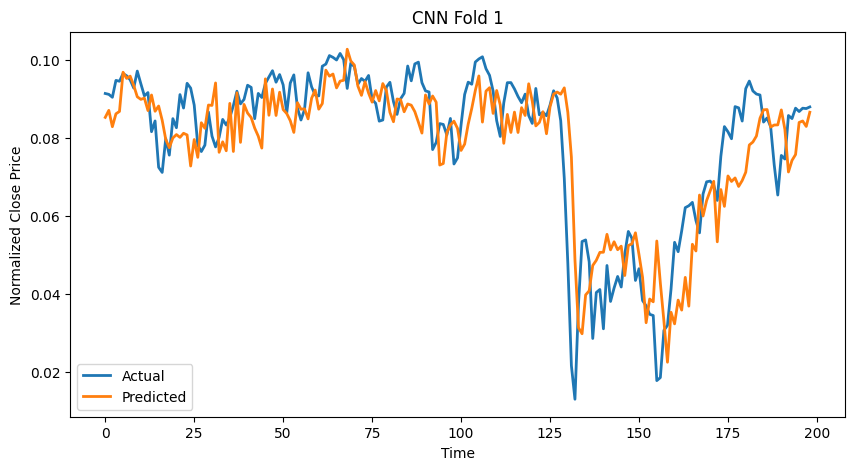

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Transfer Learning Fold 1
MSE: 0.000646, RMSE: 0.025410, MAE: 0.020876, R2: -0.6095



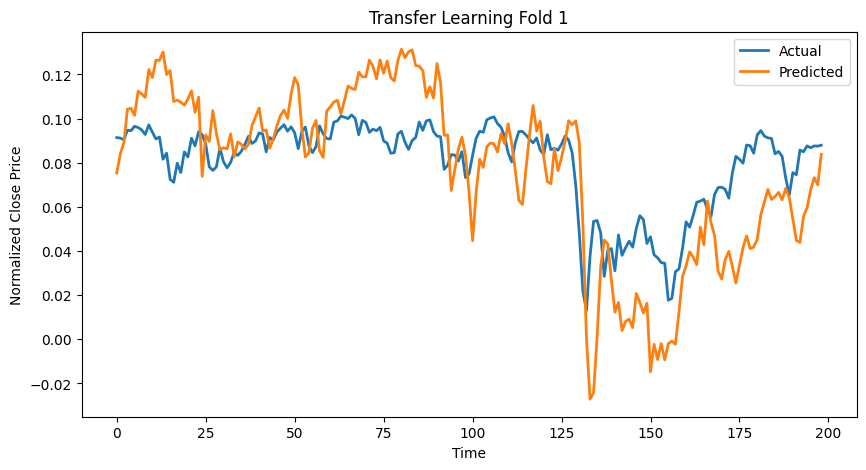

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ANN Fold 1
MSE: 0.000105, RMSE: 0.010267, MAE: 0.007384, R2: 0.7373



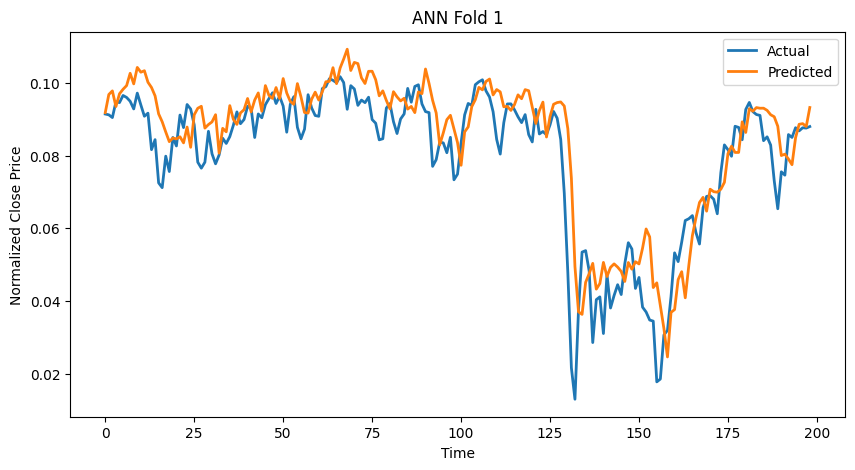


=== Fold 2 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
LSTM Fold 2
MSE: 0.000060, RMSE: 0.007776, MAE: 0.005814, R2: 0.9348



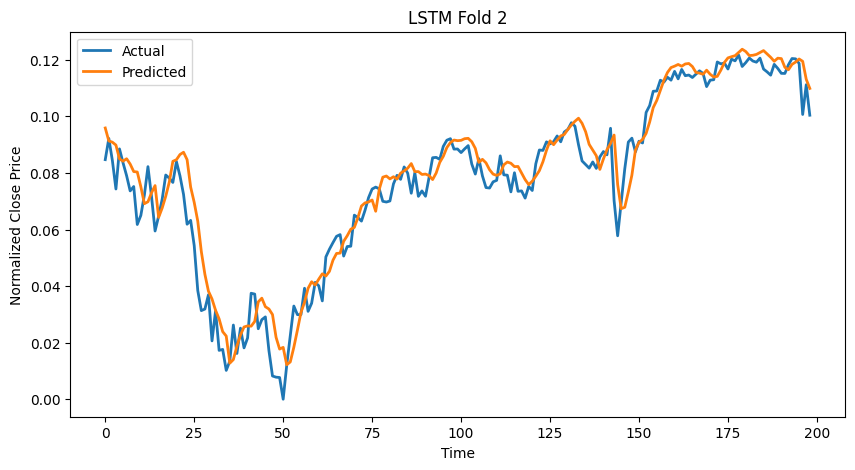

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
CNN Fold 2
MSE: 0.000109, RMSE: 0.010445, MAE: 0.008185, R2: 0.8824



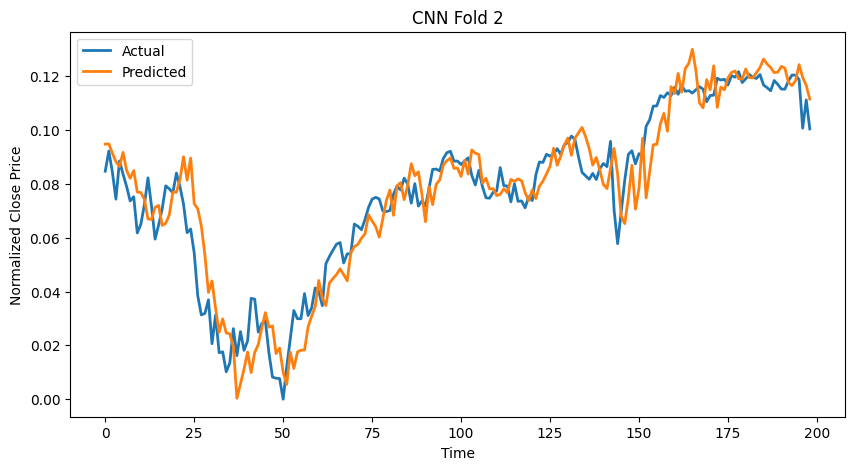

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Transfer Learning Fold 2
MSE: 0.000370, RMSE: 0.019238, MAE: 0.015015, R2: 0.6011



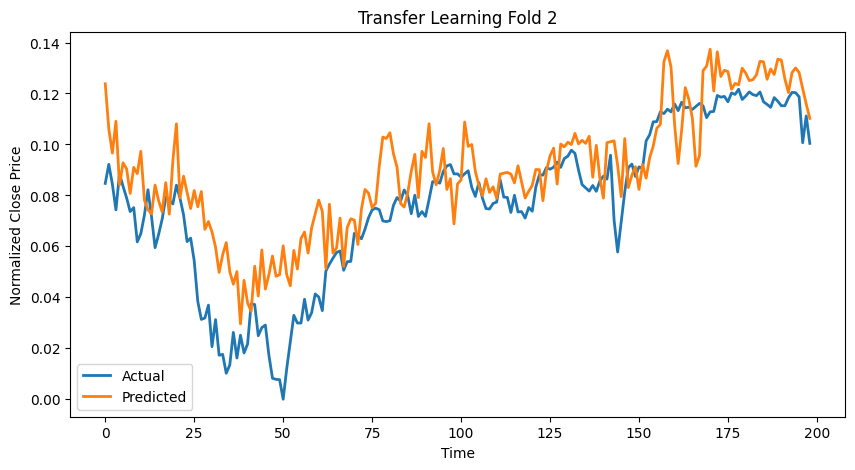

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
ANN Fold 2
MSE: 0.000096, RMSE: 0.009800, MAE: 0.007349, R2: 0.8965



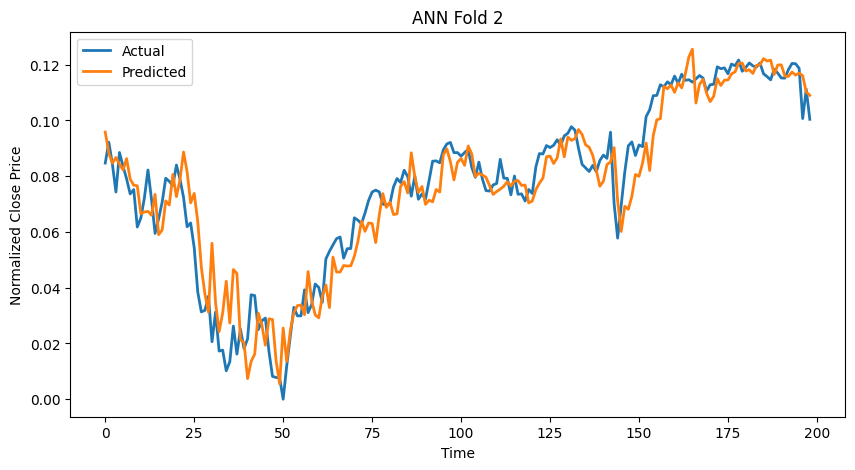


=== Fold 3 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
LSTM Fold 3
MSE: 0.000041, RMSE: 0.006370, MAE: 0.005040, R2: 0.9658



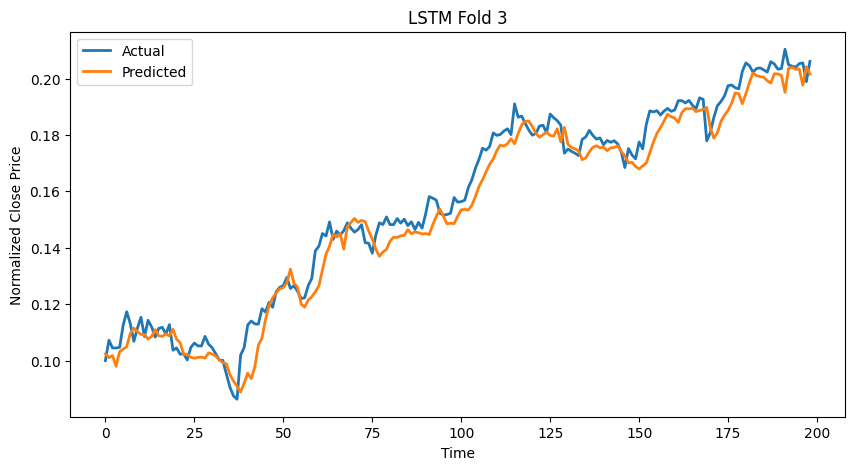

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN Fold 3
MSE: 0.000037, RMSE: 0.006120, MAE: 0.004837, R2: 0.9684



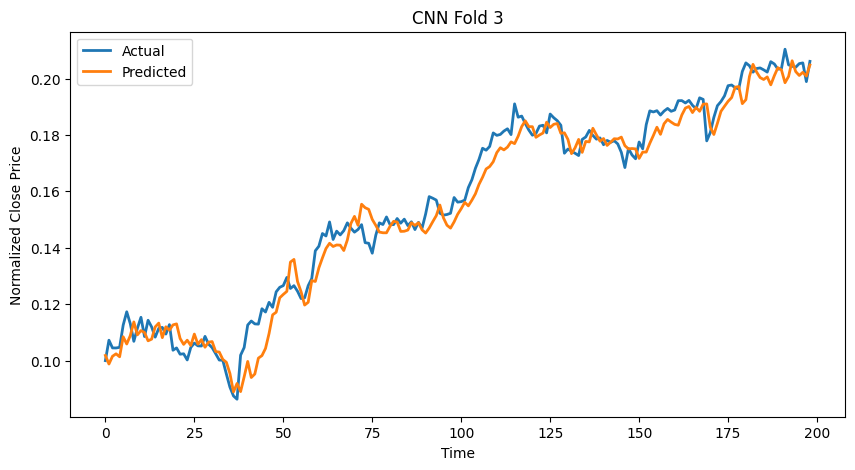

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Transfer Learning Fold 3
MSE: 0.000164, RMSE: 0.012796, MAE: 0.010097, R2: 0.8620



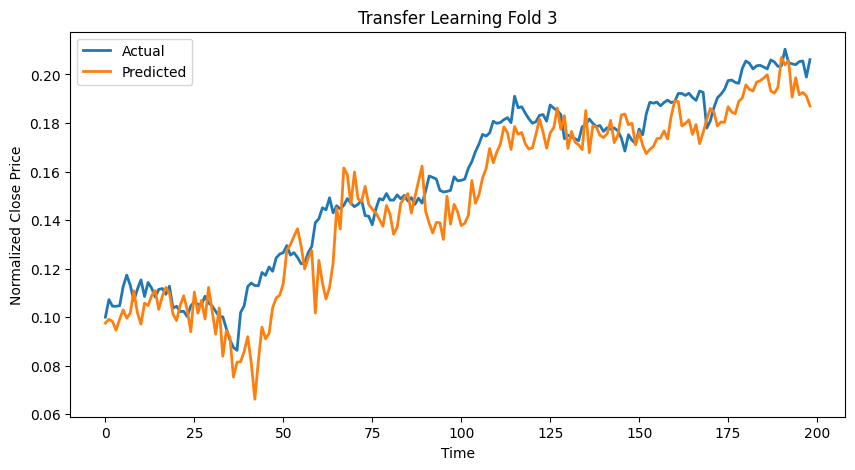

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ANN Fold 3
MSE: 0.000047, RMSE: 0.006878, MAE: 0.005488, R2: 0.9601



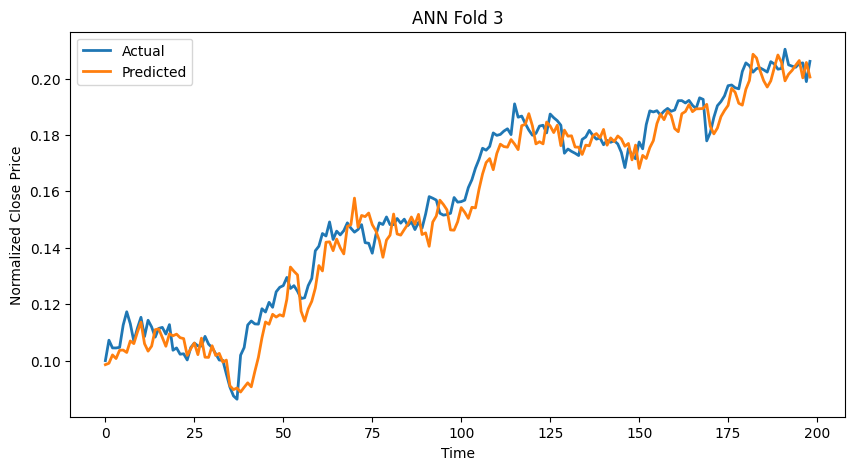


=== Fold 4 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
LSTM Fold 4
MSE: 0.000080, RMSE: 0.008930, MAE: 0.006392, R2: 0.9491



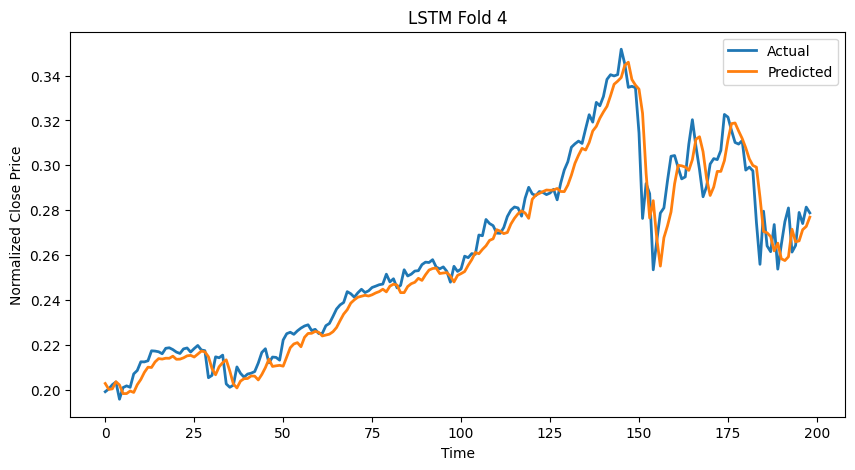

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
CNN Fold 4
MSE: 0.000165, RMSE: 0.012851, MAE: 0.010469, R2: 0.8945



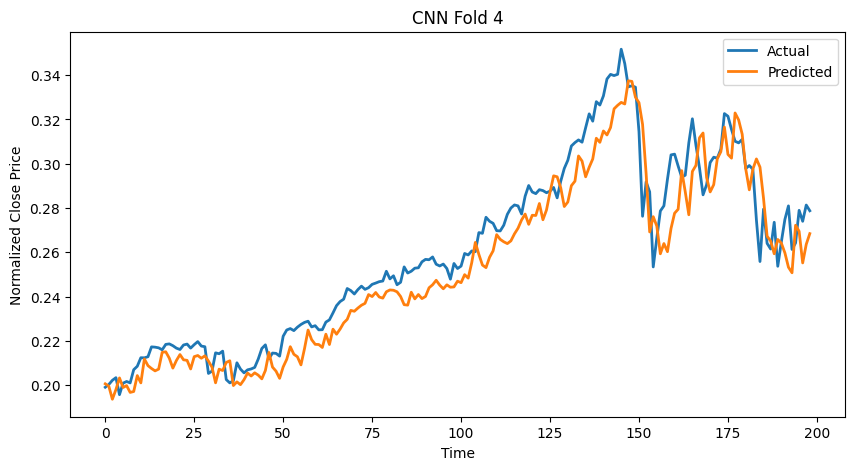

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Transfer Learning Fold 4
MSE: 0.000176, RMSE: 0.013259, MAE: 0.010171, R2: 0.8877



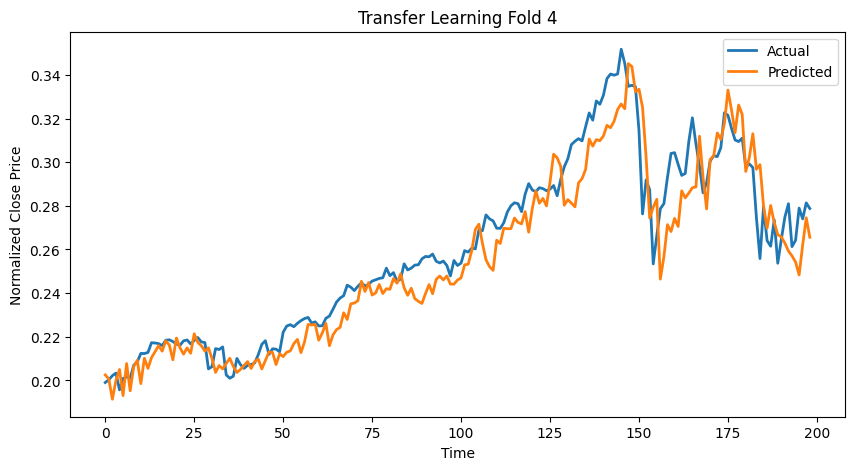

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ANN Fold 4
MSE: 0.000147, RMSE: 0.012111, MAE: 0.008978, R2: 0.9063



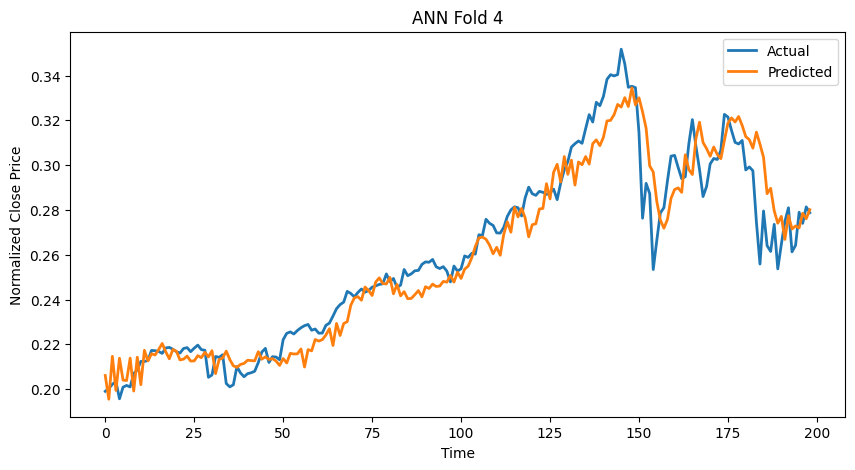


=== Fold 5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
LSTM Fold 5
MSE: 0.000135, RMSE: 0.011607, MAE: 0.008663, R2: 0.9082



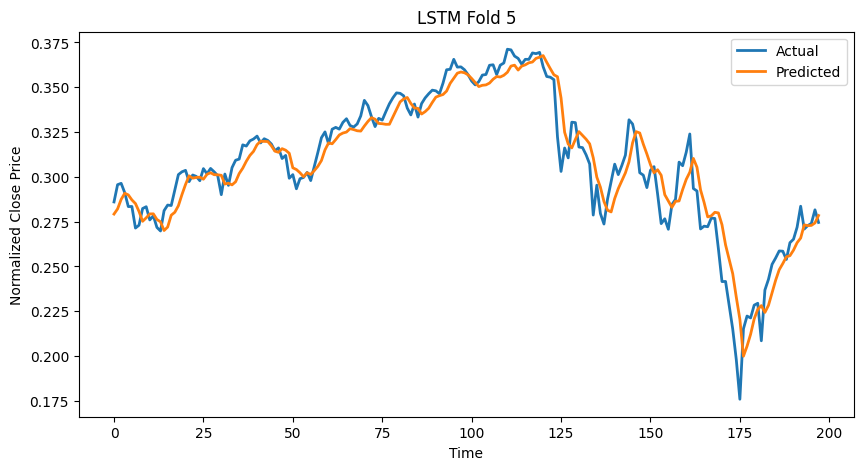

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN Fold 5
MSE: 0.000225, RMSE: 0.014986, MAE: 0.010822, R2: 0.8470



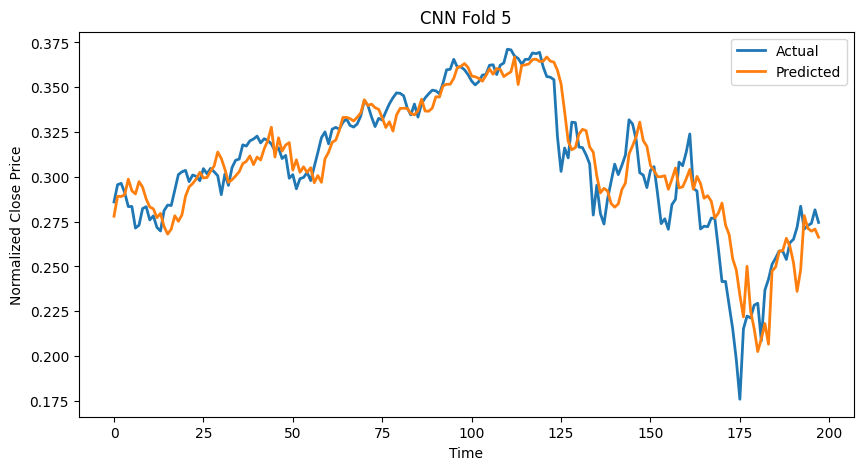

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Transfer Learning Fold 5
MSE: 0.000240, RMSE: 0.015507, MAE: 0.012198, R2: 0.8361



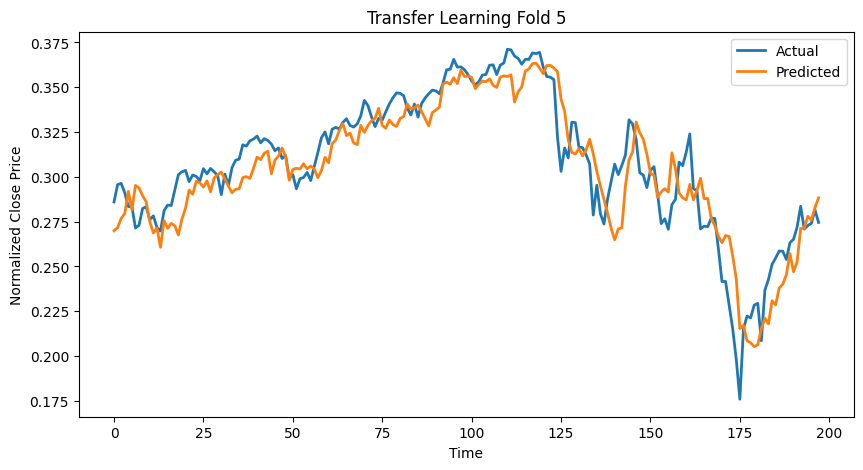

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ANN Fold 5
MSE: 0.000209, RMSE: 0.014446, MAE: 0.010349, R2: 0.8578



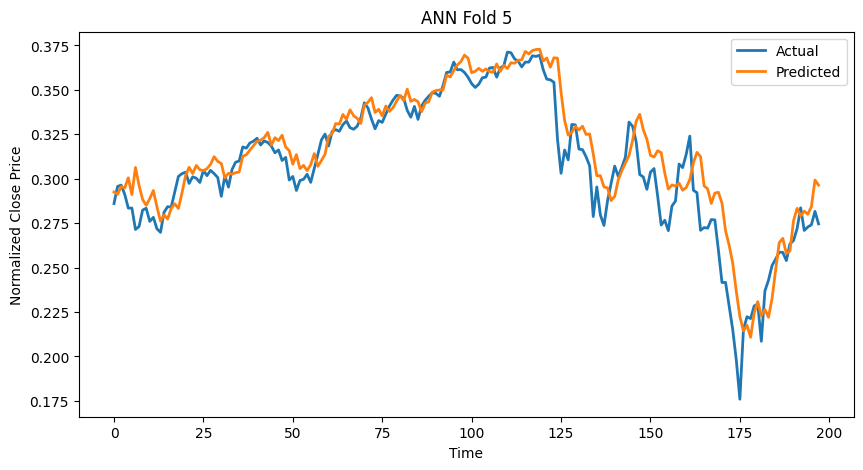


=== Fold 6 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
LSTM Fold 6
MSE: 0.000074, RMSE: 0.008623, MAE: 0.006522, R2: 0.9226



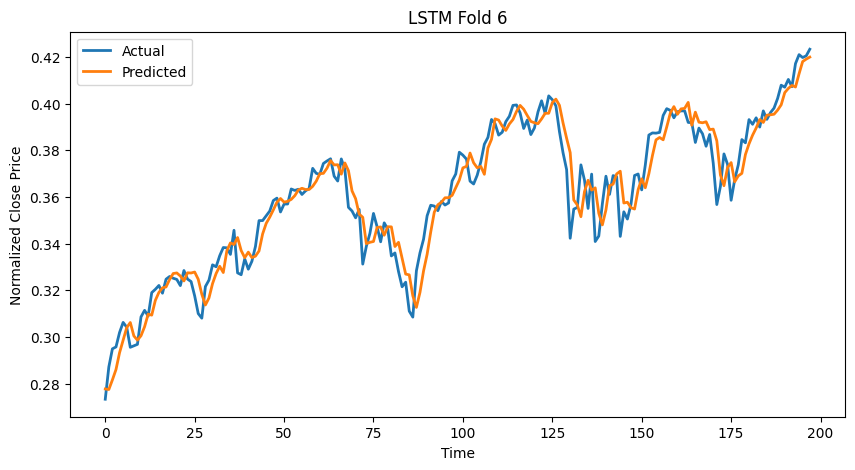

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN Fold 6
MSE: 0.000170, RMSE: 0.013031, MAE: 0.010728, R2: 0.8232



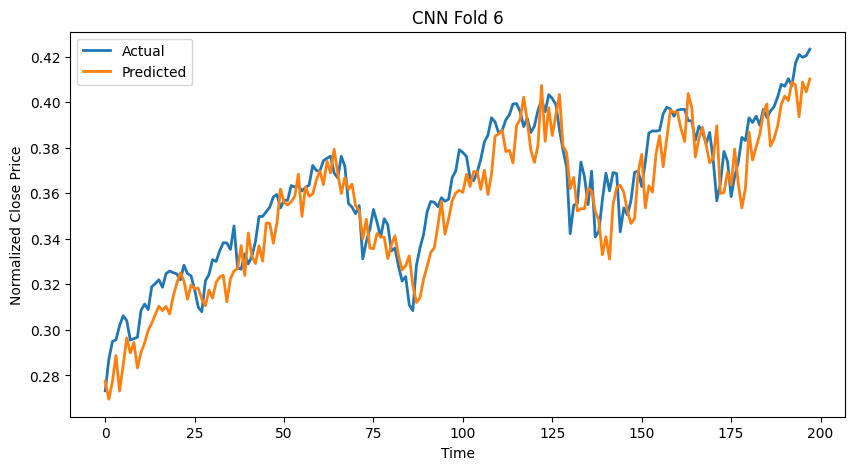

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Transfer Learning Fold 6
MSE: 0.000207, RMSE: 0.014384, MAE: 0.011805, R2: 0.7846



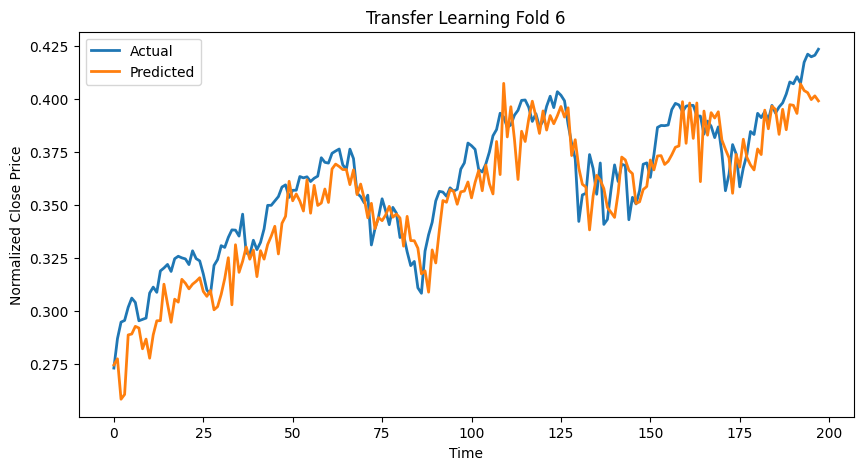

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ANN Fold 6
MSE: 0.000279, RMSE: 0.016709, MAE: 0.014783, R2: 0.7093



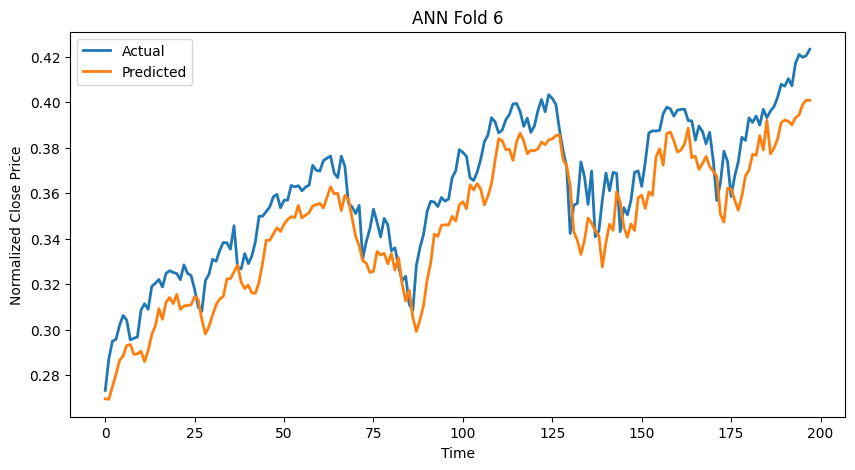


=== Fold 7 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LSTM Fold 7
MSE: 0.000571, RMSE: 0.023898, MAE: 0.015631, R2: 0.9199



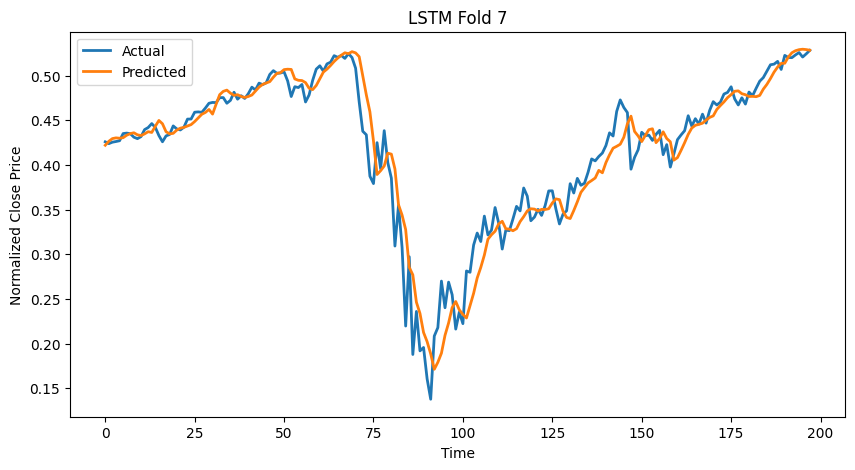

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CNN Fold 7
MSE: 0.000814, RMSE: 0.028534, MAE: 0.019663, R2: 0.8858



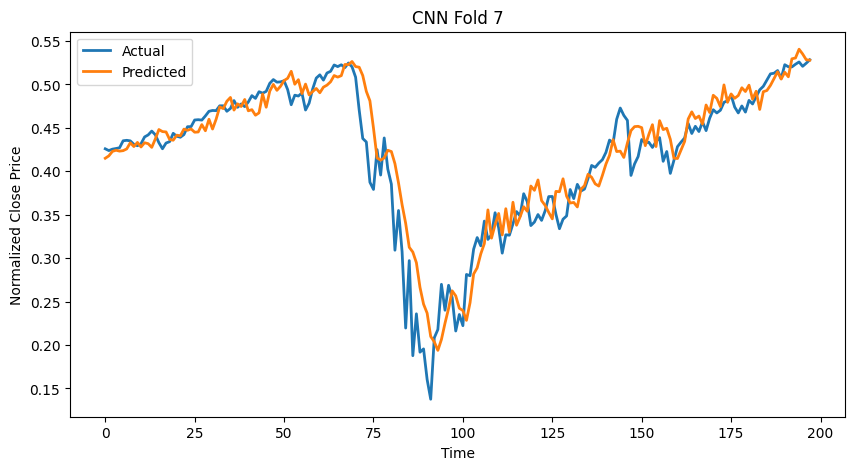

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Transfer Learning Fold 7
MSE: 0.000700, RMSE: 0.026459, MAE: 0.017343, R2: 0.9018



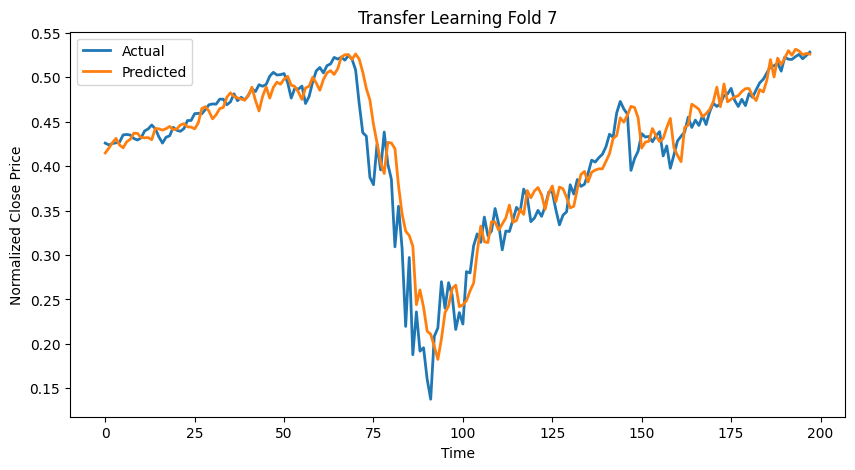

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ANN Fold 7
MSE: 0.000641, RMSE: 0.025313, MAE: 0.016158, R2: 0.9101



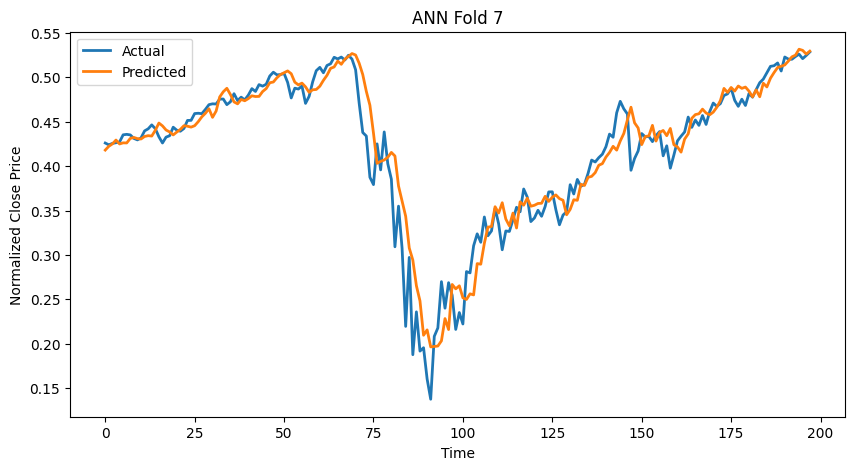


=== Fold 8 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
LSTM Fold 8
MSE: 0.000402, RMSE: 0.020039, MAE: 0.016356, R2: 0.9567



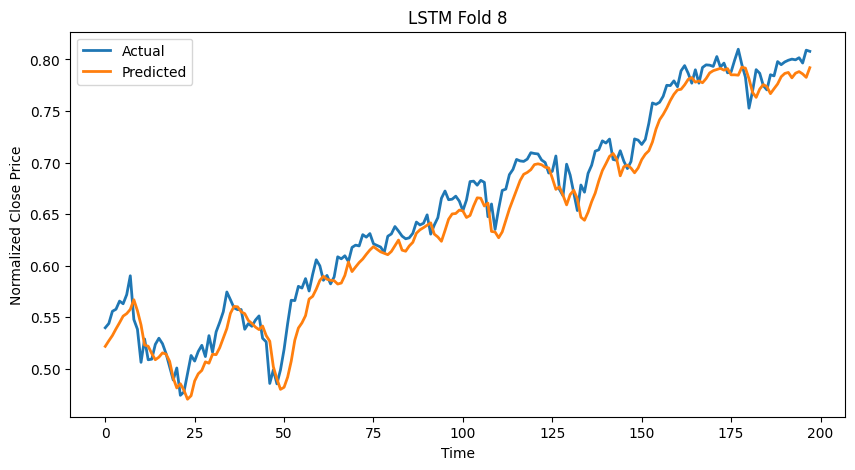

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN Fold 8
MSE: 0.000793, RMSE: 0.028156, MAE: 0.022953, R2: 0.9145



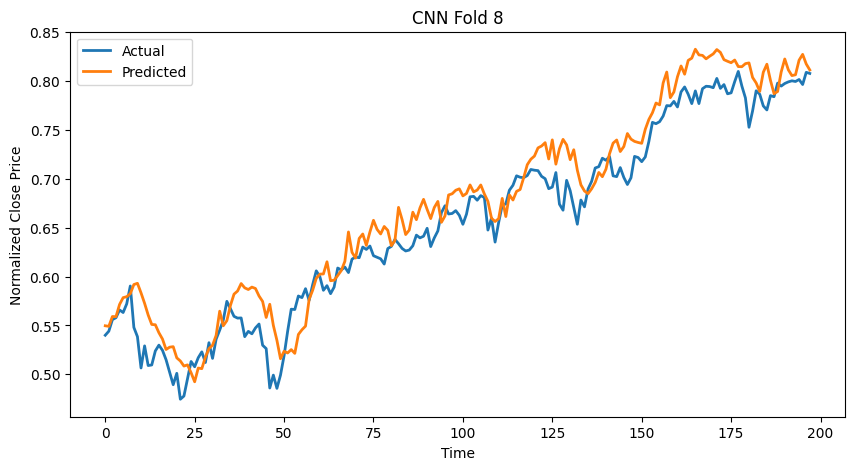

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Transfer Learning Fold 8
MSE: 0.000643, RMSE: 0.025355, MAE: 0.019902, R2: 0.9307



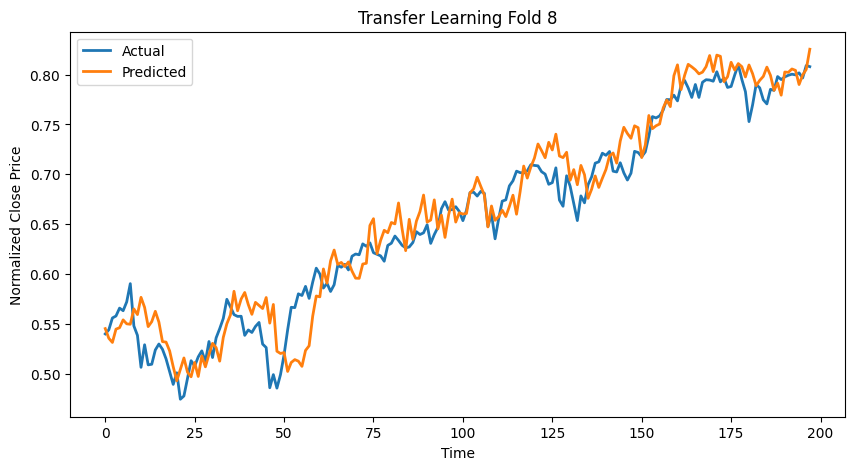

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ANN Fold 8
MSE: 0.000437, RMSE: 0.020901, MAE: 0.016633, R2: 0.9529



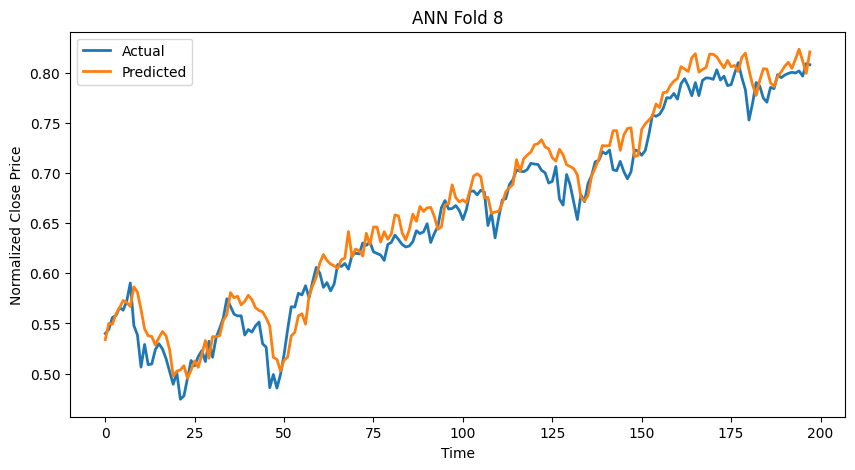


=== Fold 9 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
LSTM Fold 9
MSE: 0.000616, RMSE: 0.024829, MAE: 0.021381, R2: 0.7758



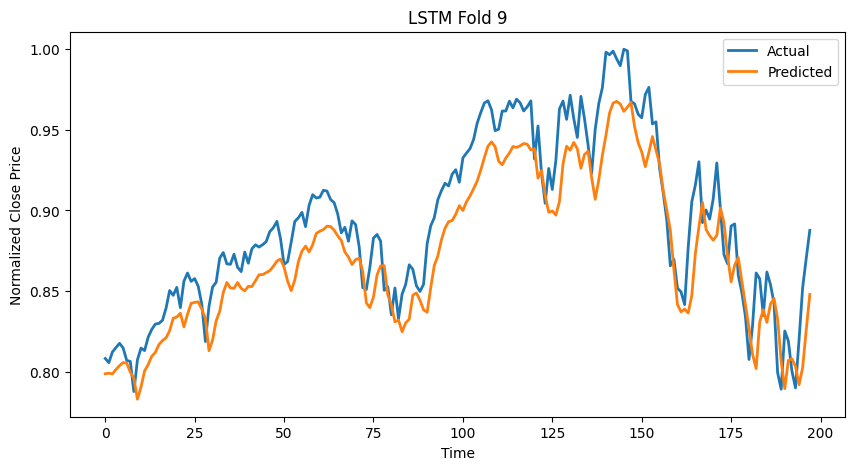

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
CNN Fold 9
MSE: 0.001019, RMSE: 0.031918, MAE: 0.024060, R2: 0.6295



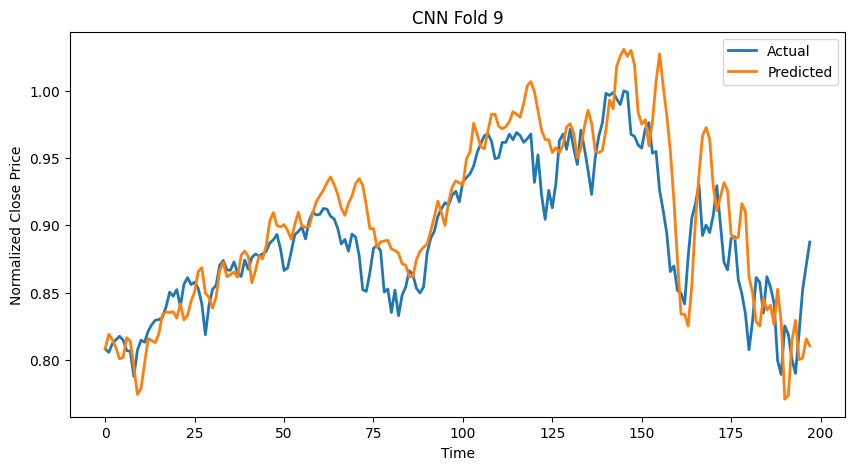

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Transfer Learning Fold 9
MSE: 0.001442, RMSE: 0.037972, MAE: 0.031937, R2: 0.4756



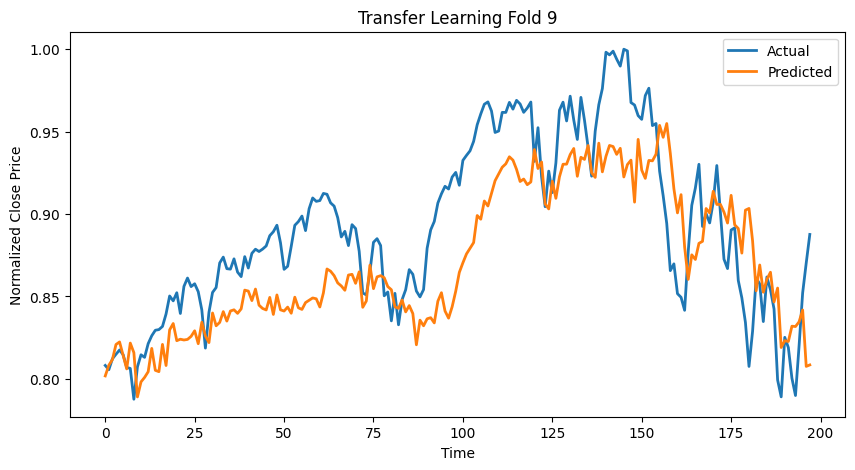

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ANN Fold 9
MSE: 0.000727, RMSE: 0.026957, MAE: 0.021999, R2: 0.7357



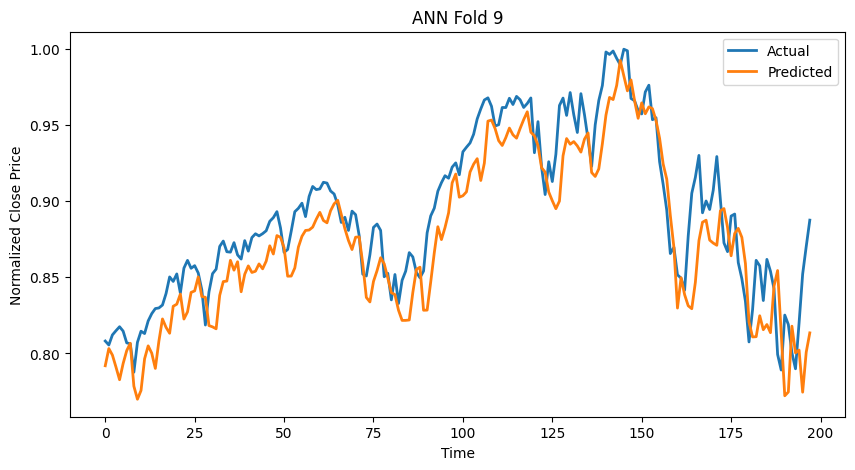


=== Fold 10 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM Fold 10
MSE: 0.000579, RMSE: 0.024056, MAE: 0.019678, R2: 0.9125



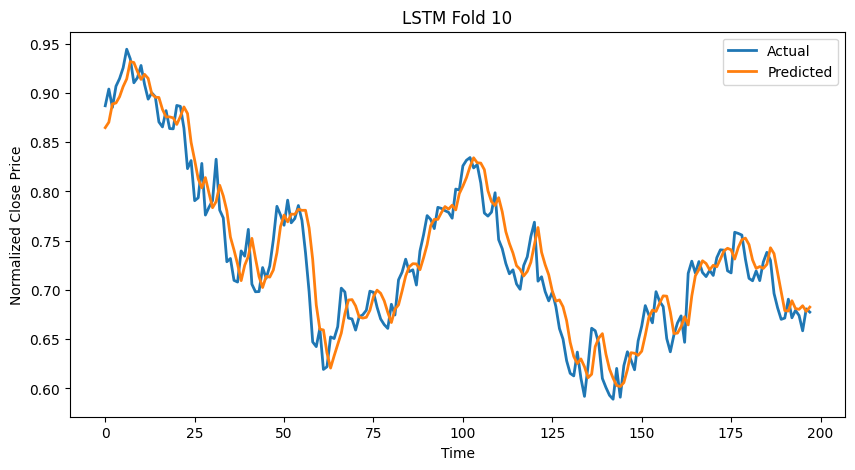

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN Fold 10
MSE: 0.001379, RMSE: 0.037139, MAE: 0.028897, R2: 0.7915



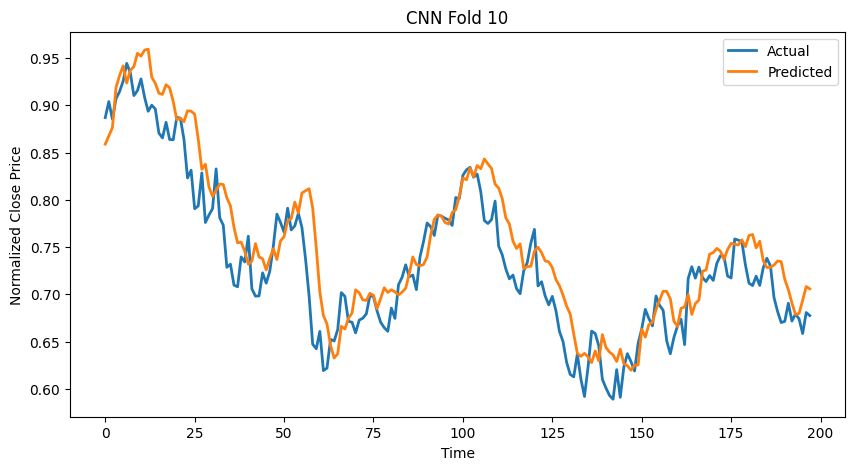

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Transfer Learning Fold 10
MSE: 0.001874, RMSE: 0.043291, MAE: 0.035224, R2: 0.7168



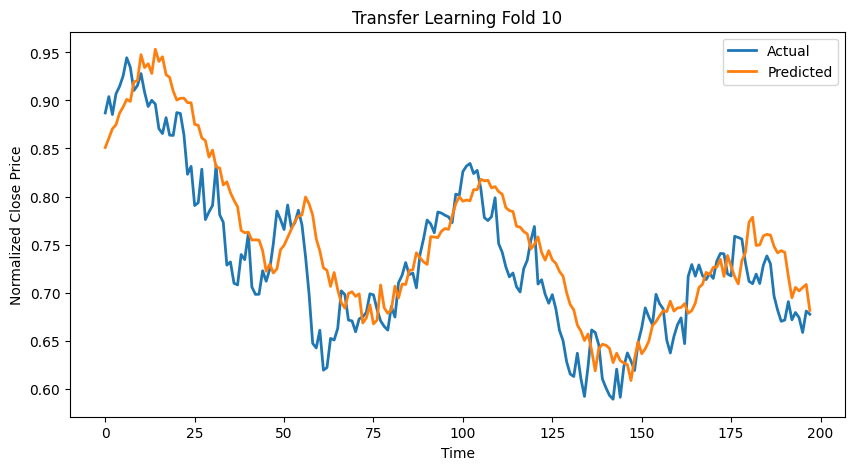

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
ANN Fold 10
MSE: 0.000821, RMSE: 0.028655, MAE: 0.023058, R2: 0.8759



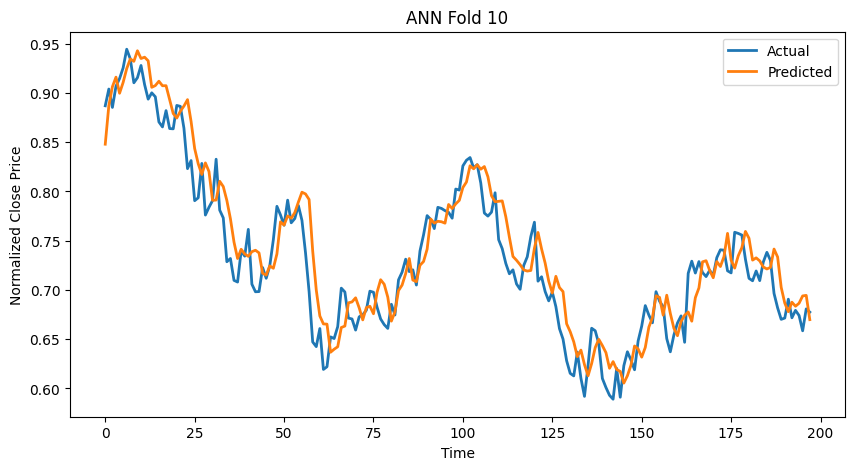

In [15]:

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=False)
input_shape = (X.shape[1], X.shape[2])
input_shape_flat = X.shape[1] * X.shape[2]

fold = 1
for train_index, test_index in kf.split(X):
    print(f"\n=== Fold {fold} ===")
    X_trainval, X_test = X[train_index], X[test_index]
    y_trainval, y_test = y[train_index], y[test_index]

    # Train/Val Split (85/15)
    val_split = int(len(X_trainval) * 0.85)
    X_train, X_val = X_trainval[:val_split], X_trainval[val_split:]
    y_train, y_val = y_trainval[:val_split], y_trainval[val_split:]

    # LSTM
    lstm_model = build_lstm_model(input_shape)
    y_true, y_pred = evaluate_model(
        lstm_model, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=30, plot_title=f"LSTM Fold {fold}"
    )
    plot_predictions(y_true, y_pred, title=f"LSTM Fold {fold}")

    # CNN
    cnn_model = build_cnn_model(input_shape)
    y_true, y_pred = evaluate_model(
        cnn_model, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=30, plot_title=f"CNN Fold {fold}"
    )
    plot_predictions(y_true, y_pred, title=f"CNN Fold {fold}")

    # Transfer Learning on CNN
    base_cnn_model = build_cnn_model(input_shape)
    base_cnn_model.fit(X_train, y_train, epochs=5, batch_size=8, verbose=0)  # Pre-train
    transfer_model = build_transfer_learning_model(base_cnn_model, input_shape)
    y_true, y_pred = evaluate_model(
        transfer_model, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=30, plot_title=f"Transfer Learning Fold {fold}"
    )
    plot_predictions(y_true, y_pred, title=f"Transfer Learning Fold {fold}")

    # ANN (Flattened input)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_val_flat = X_val.reshape(X_val.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    ann_model = build_ann_model(X_train_flat.shape[1])
    y_true, y_pred = evaluate_model(
        ann_model, X_train_flat, y_train, X_val_flat, y_val, X_test_flat, y_test,
        epochs=30, plot_title=f"ANN Fold {fold}"
    )
    plot_predictions(y_true, y_pred, title=f"ANN Fold {fold}")

    fold += 1